# Class 10.1: Intro to Word Embeddings

## Installing gensim and its dependencies and launching a Jupyter notebook

``python3 -m pip install numpy``

``python3 -m pip install scipy``

``python3 -m pip install gensim``

``python3 -m pip install scikit-learn``

``jupyter notebook``


## Getting a pre-trained word2vec model

You can get a pre-trained word2vec model built on billions words of Google newsfrom here:

https://github.com/eyaler/word2vec-slim/blob/master/GoogleNews-vectors-negative300-SLIM.bin.gz

Just click on the "download" icon next to where it says "Raw".


## Importing some libraries

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import gensim
import re
import nltk
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from gensim.models import Word2Vec



## Loading and using the pre-trained word2vec model

<b>Note: When you run the code below, it will take a minute or two to load the model!</b> Wait until you see <code>"big model loaded"</code> printed out below the cell. You can also check for the <code>*</code> in the brackets to the left of the cell you are executing.

In [5]:
bigmodel = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300-SLIM.bin.gz", binary=True)
print("big model loaded!")

big model loaded!


Now we can look at the word embedding (i.e., word vector) for any word that's in the model like this: 

In [6]:
bigmodel["dog"]

array([ 1.71980578e-02, -7.49343913e-03, -5.79820201e-02,  5.40510379e-02,
       -2.83358470e-02,  1.92454457e-02,  1.96549222e-02, -2.76806820e-02,
       -5.15941717e-03, -2.12928317e-02,  6.02750964e-02, -1.42170608e-01,
       -7.57533452e-03, -5.56889474e-02, -8.43523722e-03,  3.60340253e-02,
       -6.68267384e-02,  5.33958711e-02, -6.28957525e-02, -4.02925909e-02,
        5.20855449e-02, -3.32495756e-02,  4.78269793e-02, -5.50337844e-02,
       -2.99737565e-02,  6.71543181e-02, -5.01200520e-02,  1.07446909e-01,
        1.10067569e-01,  8.18955060e-03, -3.25944126e-02, -2.75168922e-02,
       -1.22024314e-02, -2.88272202e-02, -3.30857858e-02,  2.61041941e-03,
       -4.50425316e-03,  1.76894292e-02,  4.97924685e-02,  1.12033054e-01,
        5.56889456e-03, -7.14128837e-02, -5.05704759e-03,  1.76075343e-02,
       -3.60340253e-02, -2.98099648e-02,  8.35334212e-02, -2.35859063e-02,
       -5.36415586e-03,  2.53876075e-02, -2.35859063e-02,  3.99650075e-02,
        7.69817829e-02,  

This is not especially interesting because these numbers are not human interpretable. Instead we might like to look at how words are similar to each other, like this

In [7]:
bigmodel.similarity('dog', 'computer')

0.12194335

In [8]:
bigmodel.similarity("dog", "cat")

0.76094574

In [9]:
bigmodel.similarity("dog", "leash")

0.5424108

In [11]:
bigmodel.similarity("dog", "barking")

0.45241076

In [12]:
bigmodel.similarity("dog", "enhance")

0.01455573

We can also see what words are most similar to some word, like this:

In [13]:
bigmodel.most_similar("dog")

[('dogs', 0.8680490255355835),
 ('puppy', 0.8106428384780884),
 ('pooch', 0.7627378106117249),
 ('cat', 0.760945737361908),
 ('Rottweiler', 0.7437615394592285),
 ('beagle', 0.7418622374534607),
 ('pup', 0.740691065788269),
 ('Pomeranian', 0.7238621115684509),
 ('canines', 0.7221246957778931),
 ('chihuahua', 0.717391848564148)]

In [14]:
bigmodel.most_similar("soccer")

[('Soccer', 0.7622617483139038),
 ('football', 0.731354832649231),
 ('basketball', 0.681098461151123),
 ('volleyball', 0.6647275686264038),
 ('softball', 0.6443414092063904),
 ('lacrosse', 0.643805980682373),
 ('hockey', 0.6270937323570251),
 ('tennis', 0.616338312625885),
 ('baseball', 0.5814319252967834),
 ('sports', 0.5805468559265137)]

We can also ask the model to pick out the word that doesn't belong.

In [15]:
bigmodel.doesnt_match(["fret", "neck", "string", "key"])

'key'

In [16]:
bigmodel.doesnt_match(["breakfast", "lunch", "dinner", "chair"])

'chair'

It doesn't always work the way you think it might. 

In [17]:
bigmodel.doesnt_match(["set", "list", "dictionary", "elephant"])

'set'

We can also do cool things by combining word vectors. We can solve analogies just like on a standardized test.

"*Woman* is to *man* as ________ is to *boy*"

In [18]:
bigmodel.most_similar(positive=['woman', 'boy'], negative=['man'])

[('girl', 0.8881361484527588),
 ('mother', 0.6978276968002319),
 ('toddler', 0.6870075464248657),
 ('daughter', 0.6686559915542603),
 ('child', 0.6597288846969604),
 ('teenager', 0.6441270709037781),
 ('schoolgirl', 0.6108164191246033),
 ('niece', 0.6057229042053223),
 ('grandmother', 0.6009621024131775),
 ('baby', 0.5917591452598572)]

"*Woman* is to *man* as ________ is to *king*"

In [19]:
bigmodel.most_similar(positive=['woman', 'king'], negative=['man'])

[('queen', 0.7118192911148071),
 ('monarch', 0.6189675331115723),
 ('princess', 0.5902431607246399),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236843824386597),
 ('queens', 0.5181134939193726),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411999702454),
 ('throne', 0.5005807280540466),
 ('royal', 0.4938204884529114)]

## Visualizing word vectors

In class, I showed you some plots of word vectors, where the 300 dimensions had been projected down to 2 dimensions. Here we will use a dimensionality reduction method to reduce our word vectors to 2 dimensions so that we can visualize them. The code in the cell below will take word pairs, in which the first word is related in some way to the second word, and plot them in two dimensions. Execute this cell, and you should see a nice graph underneath.

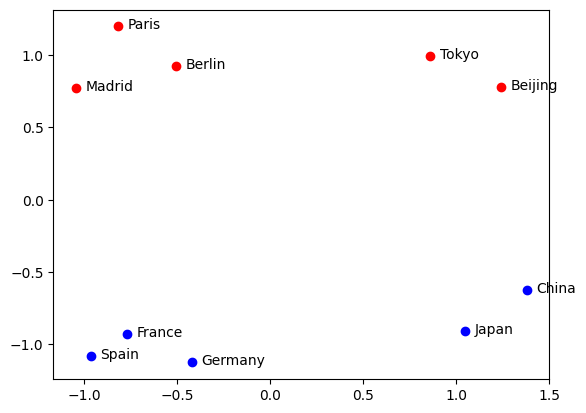

In [20]:
wordpairs = {"Madrid":"Spain", "Paris":"France",  "Berlin":"Germany", "Beijing":"China", "Tokyo":"Japan"}

# Go get the word vectors for these words and 
# then store them so you can use them later on.
vecwords = []  # stores the words above
vecs = []      # stores the vectors for each word
for k,v in wordpairs.items():
    kvec = bigmodel[k]
    vvec = bigmodel[v]
    vecs.append(kvec)
    vecwords.append(k)
    vecs.append(vvec)
    vecwords.append(v)
    
# PCA is a way to project multiple dimensions down to 
# fewer dimensions, which we are doing here so we can 
# visualize the word vectors.
pca = PCA(n_components=2, whiten=True)
vectors2d = pca.fit(vecs).transform(vecs)


# This is just some ugly matplotlib code for plotting
# the 2-D vectors and visualizing them with different colors.
i = 2
for point, word in zip(vectors2d, vecwords):
    if i%2 == 0:
        plt.scatter(point[0], point[1], c='r')
    else:
        plt.scatter(point[0], point[1], c='b')
    i += 1
    
    plt.annotate(
            word, 
            xy=(point[0], point[1]),
            xytext=(7, 6),
            textcoords='offset points',
            ha='left' ,
            va='top',
            size="medium"
            )


The cell below does something similar: it takes two lists of words and plots one in blue and one in red. If the words in one list are very related to one another and the words in the other list are very related to one another, you should see the red and blue dots clustering in different parts of the space.

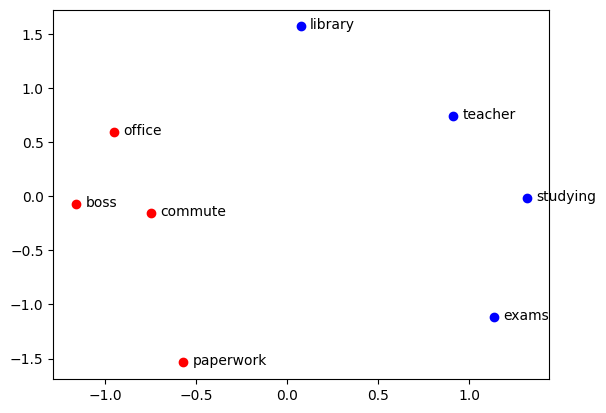

In [21]:
# Some words associated with 2 different categories: work and school

vecwords1 = "commute boss office paperwork".split()  
vecwords2 = "teacher studying library exams".split()
vecs = []
vecwords = []

# Get their vectors
for w in vecwords1:
    v = bigmodel[w]
    vecs.append(v)
    vecwords.append(w)

for w in vecwords2:
    v = bigmodel[w]
    vecs.append(v)
    vecwords.append(w)

    
#tsne = TSNE(n_components=2, random_state=0)
#vectors2d = tsne.fit_transform(vecs)

# Do the PCA to reduce to 2 dimensions
pca = PCA(n_components=2, whiten=True)
vectors2d = pca.fit(vecs).transform(vecs)

# Again, ugly matplotlib code to create visualization
i = 0
for point, word in zip(vectors2d, vecwords):
    if i < len(vecwords1):
        plt.scatter(point[0], point[1], c='r')
    else:
        plt.scatter(point[0], point[1], c='b')
    i += 1
    
    plt.annotate(
            word, 
            xy=(point[0], point[1]),
            xytext=(7, 6),
            textcoords='offset points',
            ha='left' ,
            va='top',
            size="medium"
            )